In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as mpt

mpt.style.use('_mpl-gallery')

In [35]:
df = pd.read_excel('dataset/DataLabel70.xlsx')
df.head()

,Konten,Value
0,pelaksana tugas plt wali kota cimahi ngatiyana...,POSITIF
1,seri hp gaming redmi c pantas jadi opsi redmi ...,NETRAL
2,puluhan rumah di perumahan griya zavira desa m...,NEGATIF
3,hujan diprediksi akan turun di sejumlah kota b...,NETRAL
4,pelaku pembunuhan remaja berinisial af yang di...,NEGATIF


In [36]:
df['Value'].value_counts()

Value
POSITIF    29
NETRAL     23
NEGATIF    18
Name: count, dtype: int64

In [37]:
df['Value'].count().sum()

70

Text(0.5, 0, 'Katagori Sentimen')

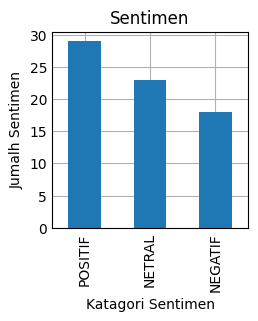

In [38]:
df['Value'].value_counts().plot(kind="bar")


mpt.title("Sentimen")
mpt.ylabel('Jumalh Sentimen')
mpt.xlabel('Katagori Sentimen')

# Case Folding

In [39]:
import re
def casefolding(kalimat):
    kalimat = kalimat.strip(" ")
    kalimat = re.sub(r'[|?|$|.|!_:")(-+,)]','', kalimat)
    return kalimat

df['Konten'] = df['Konten'].apply(casefolding)
df.head()

,Konten,Value
0,pelaksana tugas plt wali kota cimahi ngatiyana...,POSITIF
1,seri hp gaming redmi c pantas jadi opsi redmi ...,NETRAL
2,puluhan rumah di perumahan griya zavira desa m...,NEGATIF
3,hujan diprediksi akan turun di sejumlah kota b...,NETRAL
4,pelaku pembunuhan remaja berinisial af yang di...,NEGATIF


# Tokenizing

In [40]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer(r'\w+|$[0-9]+|\S')
token = df["Konten"].apply(regexp.tokenize)
df.insert(df.columns.get_loc("Value"),"Token", token)

In [41]:
df.head()

,Konten,Token,Value
0,pelaksana tugas plt wali kota cimahi ngatiyana...,"[pelaksana, tugas, plt, wali, kota, cimahi, ng...",POSITIF
1,seri hp gaming redmi c pantas jadi opsi redmi ...,"[seri, hp, gaming, redmi, c, pantas, jadi, ops...",NETRAL
2,puluhan rumah di perumahan griya zavira desa m...,"[puluhan, rumah, di, perumahan, griya, zavira,...",NEGATIF
3,hujan diprediksi akan turun di sejumlah kota b...,"[hujan, diprediksi, akan, turun, di, sejumlah,...",NETRAL
4,pelaku pembunuhan remaja berinisial af yang di...,"[pelaku, pembunuhan, remaja, berinisial, af, y...",NEGATIF


# StopWord

In [42]:
import nltk as nk
nk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AdmiN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
stopword = stopwords.words('indonesian')
txt_stopword = pd.read_csv('text/stopword.txt', names=['stopword'], header=None)
stopword.extend(['wkwk','hahahaha','haha','yang','yoi','yoyoy'])
stopword.extend(txt_stopword["stopword"][0].split('\n'))
stopword = set(stopword)

def stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [44]:
stopword = df['Token'].apply(stopwords)
df.insert(df.columns.get_loc("Value"),"stopword", stopword)

In [45]:
df.head()

,Konten,Token,stopword,Value
0,pelaksana tugas plt wali kota cimahi ngatiyana...,"[pelaksana, tugas, plt, wali, kota, cimahi, ng...","[pelaksana, tugas, plt, wali, kota, cimahi, ng...",POSITIF
1,seri hp gaming redmi c pantas jadi opsi redmi ...,"[seri, hp, gaming, redmi, c, pantas, jadi, ops...","[seri, hp, gaming, redmi, c, opsi, redmi, c, d...",NETRAL
2,puluhan rumah di perumahan griya zavira desa m...,"[puluhan, rumah, di, perumahan, griya, zavira,...","[puluhan, rumah, perumahan, griya, zavira, des...",NEGATIF
3,hujan diprediksi akan turun di sejumlah kota b...,"[hujan, diprediksi, akan, turun, di, sejumlah,...","[hujan, diprediksi, turun, kota, indonesia, se...",NETRAL
4,pelaku pembunuhan remaja berinisial af yang di...,"[pelaku, pembunuhan, remaja, berinisial, af, y...","[pelaku, pembunuhan, remaja, berinisial, af, d...",NEGATIF


# Stemming

In [46]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [47]:
def stemming(konten):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in konten:
        dt = stemmer.stem(w)
        do.append(dt)
    
    d_clean = []
    d_clean = " ".join(do)
    return d_clean

In [48]:

stemmed = df['stopword'].apply(stemming)
df.insert(df.columns.get_loc("Value"),"stemmed", stemmed)


In [51]:
df.head()

,Konten,Token,stopword,stemmed,Value
0,pelaksana tugas plt wali kota cimahi ngatiyana...,"[pelaksana, tugas, plt, wali, kota, cimahi, ng...","[pelaksana, tugas, plt, wali, kota, cimahi, ng...",laksana tugas plt wali kota cimahi ngatiyana h...,POSITIF
1,seri hp gaming redmi c pantas jadi opsi redmi ...,"[seri, hp, gaming, redmi, c, pantas, jadi, ops...","[seri, hp, gaming, redmi, c, opsi, redmi, c, d...",seri hp gaming redmi c opsi redmi c tawar laya...,NETRAL
2,puluhan rumah di perumahan griya zavira desa m...,"[puluhan, rumah, di, perumahan, griya, zavira,...","[puluhan, rumah, perumahan, griya, zavira, des...",puluh rumah rumah griya zavira desa mangkuraky...,NEGATIF
3,hujan diprediksi akan turun di sejumlah kota b...,"[hujan, diprediksi, akan, turun, di, sejumlah,...","[hujan, diprediksi, turun, kota, indonesia, se...",hujan prediksi turun kota indonesia senin juli...,NETRAL
4,pelaku pembunuhan remaja berinisial af yang di...,"[pelaku, pembunuhan, remaja, berinisial, af, y...","[pelaku, pembunuhan, remaja, berinisial, af, d...",laku bunuh remaja inisial af temu tewas enas h...,NEGATIF


In [2]:
df.to_csv('dataset/data_clean70.csv',index=False, header=True)

NameError: name 'df' is not defined

In [3]:
clean_data = pd.read_csv('dataset/data_clean70.csv')
clean_data.head()

,Konten,Token,stopword,stemmed,Value
0,pelaksana tugas plt wali kota cimahi ngatiyana...,"['pelaksana', 'tugas', 'plt', 'wali', 'kota', ...","['pelaksana', 'tugas', 'plt', 'wali', 'kota', ...",laksana tugas plt wali kota cimahi ngatiyana h...,POSITIF
1,seri hp gaming redmi c pantas jadi opsi redmi ...,"['seri', 'hp', 'gaming', 'redmi', 'c', 'pantas...","['seri', 'hp', 'gaming', 'redmi', 'c', 'opsi',...",seri hp gaming redmi c opsi redmi c tawar laya...,NETRAL
2,puluhan rumah di perumahan griya zavira desa m...,"['puluhan', 'rumah', 'di', 'perumahan', 'griya...","['puluhan', 'rumah', 'perumahan', 'griya', 'za...",puluh rumah rumah griya zavira desa mangkuraky...,NEGATIF
3,hujan diprediksi akan turun di sejumlah kota b...,"['hujan', 'diprediksi', 'akan', 'turun', 'di',...","['hujan', 'diprediksi', 'turun', 'kota', 'indo...",hujan prediksi turun kota indonesia senin juli...,NETRAL
4,pelaku pembunuhan remaja berinisial af yang di...,"['pelaku', 'pembunuhan', 'remaja', 'berinisial...","['pelaku', 'pembunuhan', 'remaja', 'berinisial...",laku bunuh remaja inisial af temu tewas enas h...,NEGATIF


In [4]:
clean_data = clean_data.astype({'Value' : 'category'})
clean_data = clean_data.astype({'stemmed' : 'string'})
clean_data.dtypes


Konten              object
Token               object
stopword            object
stemmed     string[python]
Value             category
dtype: object

# Feature Extraction

## TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(clean_data['stemmed'].astype('U'))

## Bags Of Words

In [7]:
bow = CountVectorizer()
bow.fit(clean_data['stemmed'])
bow_feature = bow.transform(clean_data['stemmed'].astype('U'))

## Term Pressence

# Split Data ( TF-IDF )

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(text_tf, clean_data['Value'], test_size=0.2, random_state=42)

In [10]:
# postif = clean_data[clean_data['Value']=='POSITIF'][0:10]
# negatif = clean_data[clean_data['Value']=='NEGATIF'][0:10]
# netral = clean_data[clean_data['Value']=='NETRAL'][0:10]

# Implementasi Algoritma

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import sklearn.svm as svm
import sklearn.naive_bayes as nb


## Support Vector Machine (SVM)

In [12]:
classifier = svm.SVC(kernel="linear",gamma='auto', C=2 )
classifier.fit(x_train,y_train)

predicted_svm = classifier.predict(x_test)
report  = classification_report(y_test, predicted_svm)

In [13]:
print("SVC Accuracy: ", accuracy_score(y_test, predicted_svm))
print("SVC Precision: ", precision_score(y_test, predicted_svm, average='micro'))
print("SVC Recall: ", recall_score(y_test, predicted_svm, average='micro'))
print("SVC f1_score: ", f1_score(y_test, predicted_svm, average='micro'))


print(f"Confussion matrix: \n {confusion_matrix(y_test,predicted_svm)}")
print("=============================================================")
print(report)

SVC Accuracy:  0.6428571428571429
SVC Precision:  0.6428571428571429
SVC Recall:  0.6428571428571429
SVC f1_score:  0.6428571428571429
Confussion matrix: 
 [[2 0 0]
 [0 4 2]
 [3 0 3]]
              precision    recall  f1-score   support

     NEGATIF       0.40      1.00      0.57         2
      NETRAL       1.00      0.67      0.80         6
     POSITIF       0.60      0.50      0.55         6

    accuracy                           0.64        14
   macro avg       0.67      0.72      0.64        14
weighted avg       0.74      0.64      0.66        14



## Naive Bayes

In [14]:
clf = nb.MultinomialNB().fit(x_train,y_train)
predicted_clf = clf.predict(x_test)

print("MultinomialNB Accuracy: ", accuracy_score(y_test, predicted_clf))
print("MultinomialNB Precision: ", precision_score(y_test, predicted_clf, average='micro'))
print("MultinomialNB Recall: ", recall_score(y_test, predicted_clf, average='micro'))
print("MultinomialNB f1_score: ", f1_score(y_test, predicted_clf, average='micro'))


print(f"Confussion matrix: \n {confusion_matrix(y_test,predicted_clf)}")
print("===============================================================")
print(classification_report(y_test, predicted_clf, zero_division=0))


MultinomialNB Accuracy:  0.7857142857142857
MultinomialNB Precision:  0.7857142857142857
MultinomialNB Recall:  0.7857142857142857
MultinomialNB f1_score:  0.7857142857142857
Confussion matrix: 
 [[1 0 1]
 [0 4 2]
 [0 0 6]]
              precision    recall  f1-score   support

     NEGATIF       1.00      0.50      0.67         2
      NETRAL       1.00      0.67      0.80         6
     POSITIF       0.67      1.00      0.80         6

    accuracy                           0.79        14
   macro avg       0.89      0.72      0.76        14
weighted avg       0.86      0.79      0.78        14



# Split Data ( bags of Words )

In [15]:
x_train, x_test, y_train, y_test = train_test_split(bow_feature, clean_data['Value'], test_size=0.2, random_state=42)

# Implementasi Algoritma

## Support Vector Machine (SVM)

In [16]:
classifier = svm.SVC(kernel="linear",gamma='auto', C=2 )
classifier.fit(x_train,y_train)

predicted_svm = classifier.predict(x_test)
report  = classification_report(y_test, predicted_svm)

In [17]:
print("SVC Accuracy: ", accuracy_score(y_test, predicted_svm))
print("SVC Precision: ", precision_score(y_test, predicted_svm, average='micro'))
print("SVC Recall: ", recall_score(y_test, predicted_svm, average='micro'))
print("SVC f1_score: ", f1_score(y_test, predicted_svm, average='micro'))


print(f"Confussion matrix: \n {confusion_matrix(y_test,predicted_svm)}")
print("=============================================================")
print(report)

SVC Accuracy:  0.5714285714285714
SVC Precision:  0.5714285714285714
SVC Recall:  0.5714285714285714
SVC f1_score:  0.5714285714285714
Confussion matrix: 
 [[2 0 0]
 [0 4 2]
 [4 0 2]]
              precision    recall  f1-score   support

     NEGATIF       0.33      1.00      0.50         2
      NETRAL       1.00      0.67      0.80         6
     POSITIF       0.50      0.33      0.40         6

    accuracy                           0.57        14
   macro avg       0.61      0.67      0.57        14
weighted avg       0.69      0.57      0.59        14



## Naive Bayes

In [18]:
clf = nb.MultinomialNB().fit(x_train,y_train)
predicted_clf = clf.predict(x_test)

print("MultinomialNB Accuracy: ", accuracy_score(y_test, predicted_clf))
print("MultinomialNB Precision: ", precision_score(y_test, predicted_clf, average='micro'))
print("MultinomialNB Recall: ", recall_score(y_test, predicted_clf, average='micro'))
print("MultinomialNB f1_score: ", f1_score(y_test, predicted_clf, average='micro'))


print(f"Confussion matrix: \n {confusion_matrix(y_test,predicted_clf)}")
print("===============================================================")
print(classification_report(y_test, predicted_clf, zero_division=0))


MultinomialNB Accuracy:  0.5
MultinomialNB Precision:  0.5
MultinomialNB Recall:  0.5
MultinomialNB f1_score:  0.5
Confussion matrix: 
 [[2 0 0]
 [0 4 2]
 [5 0 1]]
              precision    recall  f1-score   support

     NEGATIF       0.29      1.00      0.44         2
      NETRAL       1.00      0.67      0.80         6
     POSITIF       0.33      0.17      0.22         6

    accuracy                           0.50        14
   macro avg       0.54      0.61      0.49        14
weighted avg       0.61      0.50      0.50        14

